In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [133]:
def read(path):
  img=cv2.imread(path)
  return img
def grayscale(img):
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return gray


def threhold(gray):
  blur  = cv2.GaussianBlur(gray, (3,3), 0)
  _,binary=cv2.threshold(blur,125,255,cv2.THRESH_BINARY)
  return binary

def adaptive_threshold(img_gray):
  gau_blur=cv2.GaussianBlur(img_gray,(5,5),0)
  binary_img = cv2.adaptiveThreshold(
  img_gray, 255,
  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,21, 10
  )
  return binary_img


def morpholocial(binary):
  kernel=np.ones((9,9),np.uint8)
  mored=cv2.morphologyEx(binary,cv2.MORPH_OPEN,kernel)
  return mored

def morpholocial2(binary):
  kernel= np.ones((3,3),np.uint8)
  closing= cv2.morphologyEx(binary,cv2.MORPH_CLOSE,kernel,iterations=2)
  opening=cv2.morphologyEx(closing,cv2.MORPH_OPEN,kernel,iterations=2)
  return opening

def complement(binary):
  complement=cv2.bitwise_not(binary)
  return complement

def find_countour(binary):
  contours,_=cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  return contours

def draw_countour1(img,contours):
  img_copy=img.copy()
  cv2.drawContours(img_copy,contours,-1,(0,255,0),2)
  return img_copy

def count_o(contours):
  return len(contours)

def connect_compound(binary):
  num_labels, labels_img = cv2.connectedComponents(binary,8)
  return num_labels,labels_img

def tonhan(labels_img,num_labels):
  h,w=labels_img.shape
  color_img=np.zeros((h,w,3),np.uint8)
  for i in range(1,num_labels):
    color= [random.randint(0,255) for j in range(3)]
    color_img[labels_img==i]=color

  return color_img





In [ ]:
def pipeline1(path):
  img=read(path)
  gray=grayscale(img)
  binary=threhold(gray)
  morphed=morpholocial(binary)
  compled=complement(morphed)
  contours=find_countour(compled)
  # re=draw_countour1(img,contours)
  count=count_o(contours)
  num,label= connect_compound(compled)
  tonhan_img= tonhan(label,num)

  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  plt.title('Anh goc')
  plt.subplot(1,2,2)
  plt.imshow(tonhan_img)
  plt.title('Anh sau khi xu ly')
  plt.show()
  print(f"So contour {count}")








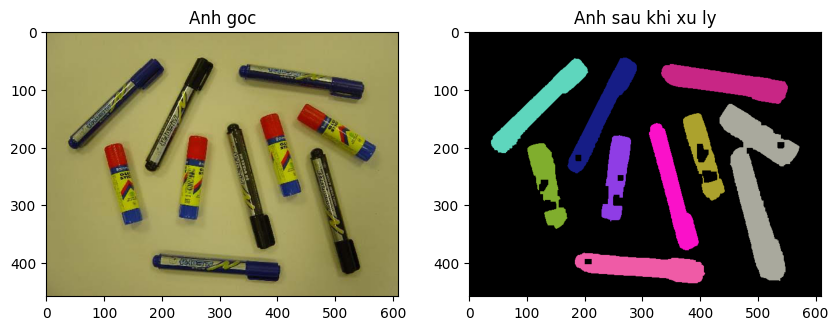

So contour 10


In [ ]:
if __name__=="__main__":
  pipeline1("/content/drive/MyDrive/Colab Notebooks/cau1.jpg")

so cuon chi 246


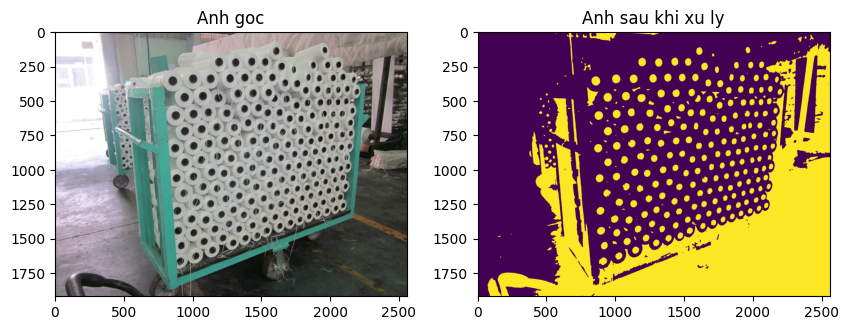

In [132]:
# cau 2
img=cv2.imread("/content/drive/MyDrive/Colab Notebooks/DEMCUONCHI.jpg")
gray=grayscale(img)
blur=cv2.GaussianBlur(gray,(15,15),0)
_,binary=cv2.threshold(blur,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

binary= cv2.bitwise_not(binary)

kernel= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
binary=cv2.morphologyEx(binary,cv2.MORPH_CLOSE,kernel,iterations=2)
binary=cv2.morphologyEx(binary,cv2.MORPH_OPEN,kernel,iterations=2)

num,label,stats,centroids= cv2.connectedComponentsWithStats(binary,8,cv2.CV_32S)
min=200
object_a=stats[1:,cv2.CC_STAT_AREA]>min
count=np.sum(object_a)
print(f"so cuon chi {count}")
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Anh goc')
plt.subplot(1,2,2)
plt.imshow(binary)
plt.title('Anh sau khi xu ly')
plt.show()





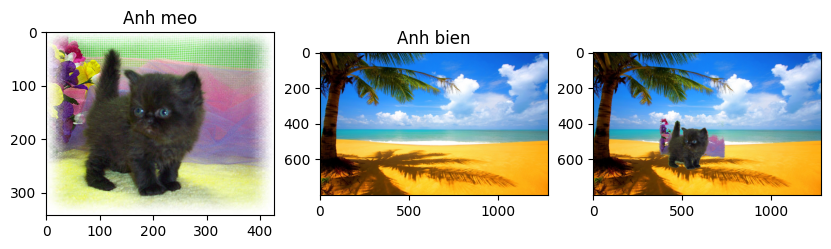

In [134]:
meo=cv2.imread("/content/drive/MyDrive/Colab Notebooks/black_kitten.jpg")

bien=cv2.imread("/content/drive/MyDrive/Colab Notebooks/beach.jpg")

bien_color= cv2.cvtColor(bien,cv2.COLOR_BGR2RGB)
meo_color= cv2.cvtColor(meo,cv2.COLOR_BGR2RGB)

gaty= cv2.cvtColor(meo,cv2.COLOR_BGR2GRAY)
_,mask= cv2.threshold(gaty,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
mask_inv=cv2.bitwise_not(mask)

m= cv2.bitwise_and(meo,meo,mask=mask)

h,w=meo.shape[:2]
y,x=350,350
roi=bien[y:y+h,x:x+w]

bien_roi=cv2.bitwise_and(roi,roi,mask=mask_inv)

dst_roi=cv2.add(bien_roi,m)
bien[y:y+h,x:x+w]=dst_roi

re_rbg= cv2.cvtColor(bien,cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(meo_color)
plt.title('Anh meo')
plt.subplot(1,3,2)
plt.imshow(bien_color)
plt.title('Anh bien')
plt.subplot(1,3,3)
plt.imshow(re_rbg)

plt.show()


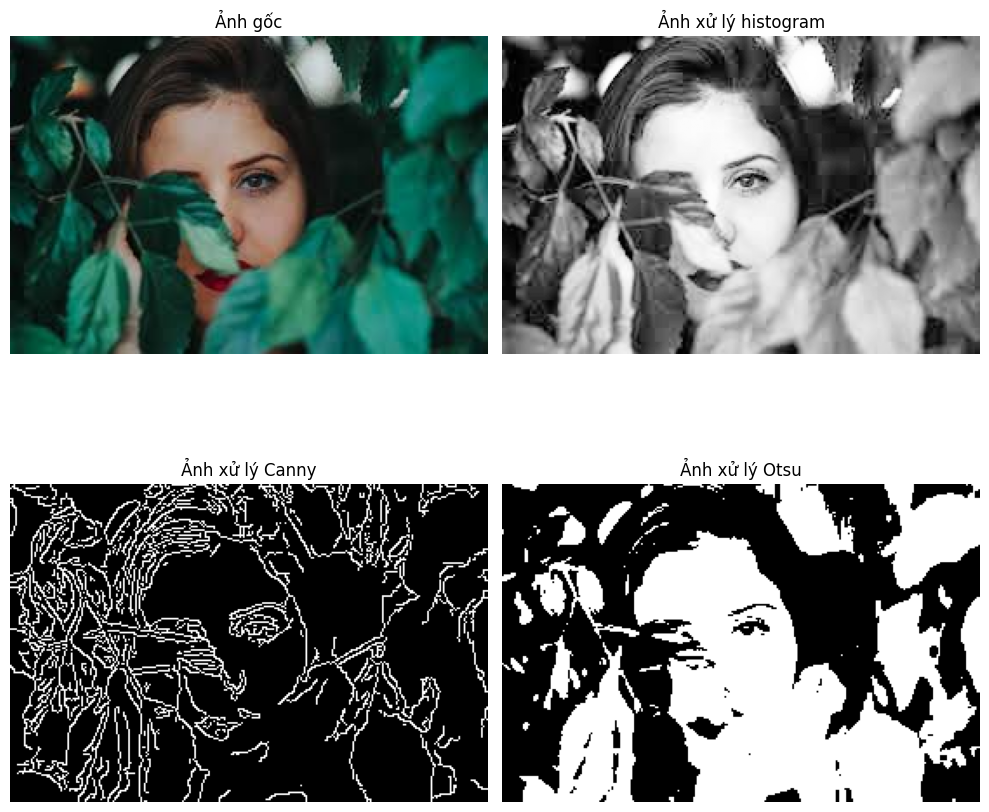

In [135]:

anh = cv2.imread("/content/drive/MyDrive/Colab Notebooks/phunu.jpg")

anh_gray = cv2.cvtColor(anh, cv2.COLOR_BGR2GRAY)
equalize = cv2.equalizeHist(anh_gray)
edges = cv2.Canny(equalize, 100, 200)
_, otsu = cv2.threshold(equalize, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(anh, cv2.COLOR_BGR2RGB))
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(equalize, cmap='gray')
plt.title("Ảnh xử lý histogram")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(edges, cmap='gray')
plt.title("Ảnh xử lý Canny")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(otsu, cmap='gray')
plt.title("Ảnh xử lý Otsu")
plt.axis("off")

plt.tight_layout()
plt.show()

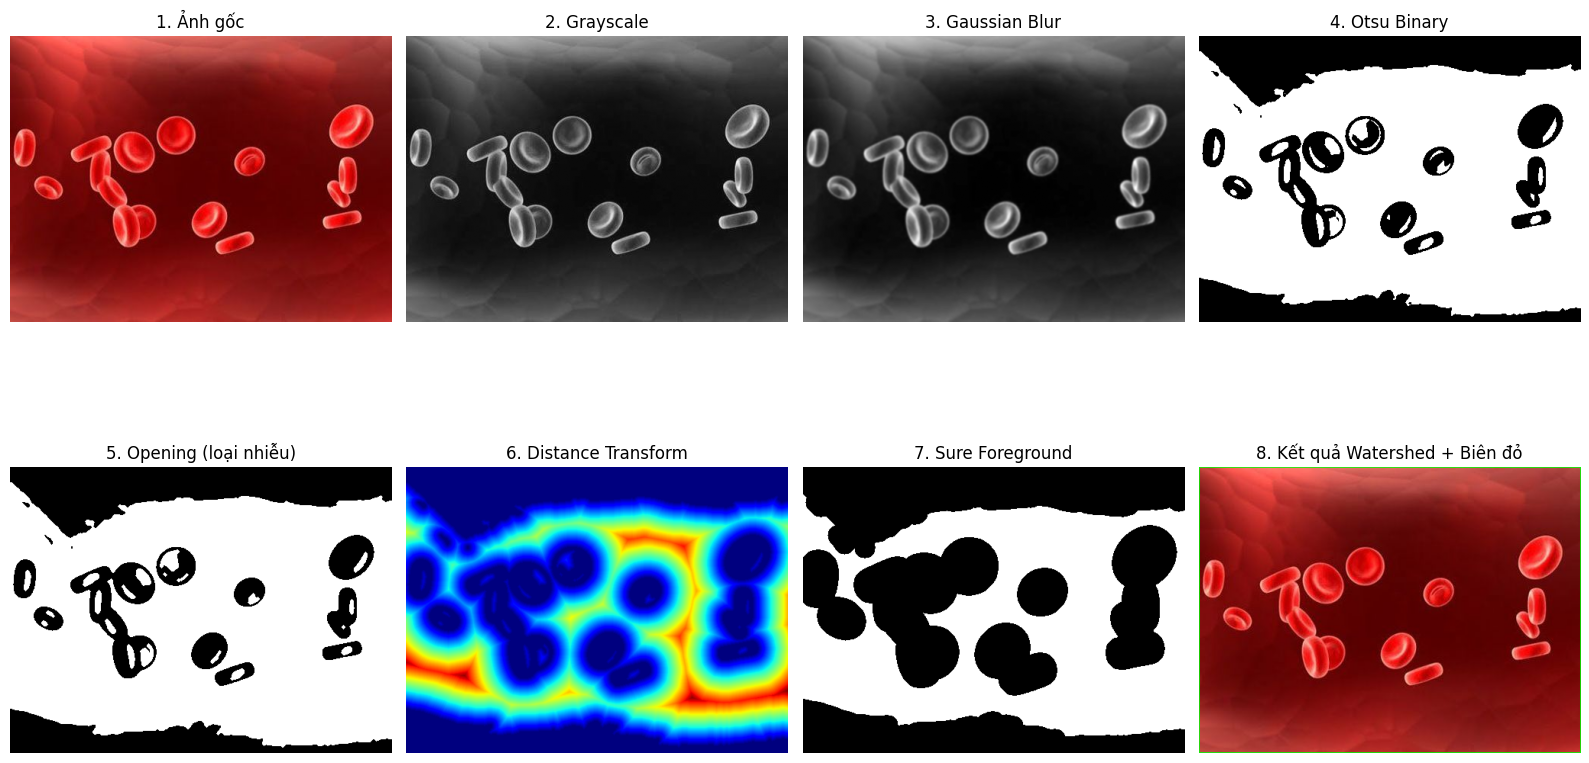

In [52]:

image_path = "/content/drive/MyDrive/Colab Notebooks/blood.jpg"
img_color = cv2.imread(image_path)
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
dist_transform = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX)
dist_transform = dist_transform.astype(np.uint8)

_, sure_fg = cv2.threshold(dist_transform, 0.2 * dist_transform.max(), 255, 0)
sure_fg = sure_fg.astype(np.uint8)

num_labels, labels = cv2.connectedComponents(sure_fg)
markers = labels + 1
markers[opening == 0] = 0  # Đảm bảo background (ngoài opening) là 0

markers = markers.astype(np.int32)
cv2.watershed(img_color, markers)

boundaries = np.zeros_like(img_color)
boundaries[markers == -1] = [0,255, 0]  # Viền phân vùng = đỏ

result = img_color.copy()
result[markers == -1] = [0,255, 0]

plt.figure(figsize=(16, 10))

plt.subplot(2, 4, 1)
plt.title("1. Ảnh gốc")
plt.imshow(img_color)
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title("2. Grayscale")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title("3. Gaussian Blur")
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title("4. Otsu Binary")
plt.imshow(binary, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title("5. Opening (loại nhiễu)")
plt.imshow(opening, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title("6. Distance Transform")
plt.imshow(dist_transform, cmap='jet')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title("7. Sure Foreground")
plt.imshow(sure_fg, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title("8. Kết quả Watershed + Biên đỏ")
plt.imshow(result)
plt.axis('off')

plt.tight_layout()
plt.show()



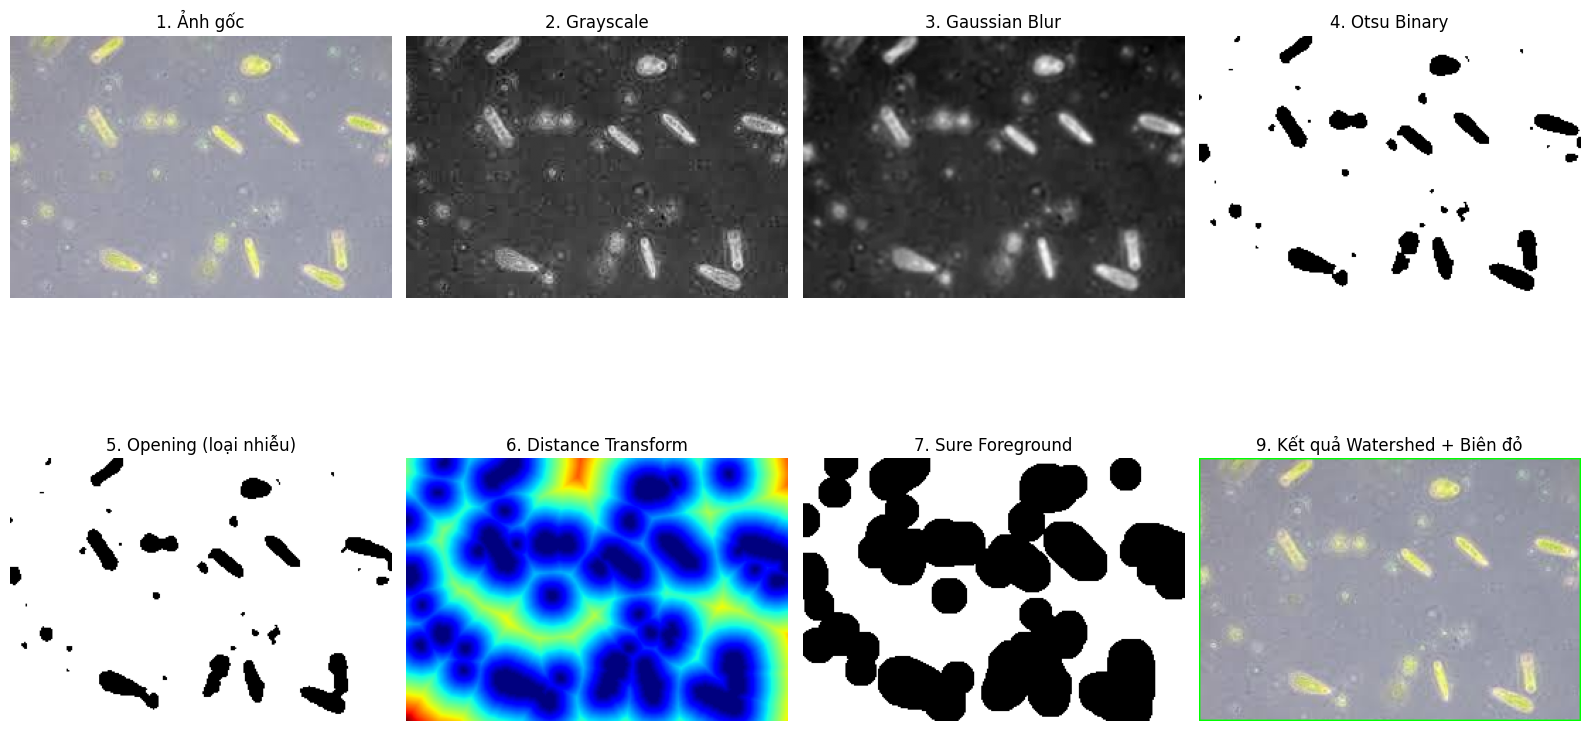

In [10]:

image_path = "/content/drive/MyDrive/Colab Notebooks/visinh.jfif"
img_color = cv2.imread(image_path)
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
dist_transform = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX)
dist_transform = dist_transform.astype(np.uint8)

_, sure_fg = cv2.threshold(dist_transform, 0.2 * dist_transform.max(), 255, 0)
sure_fg = sure_fg.astype(np.uint8)

num_labels, labels = cv2.connectedComponents(sure_fg)
markers = labels + 1
markers[opening == 0] = 0  # Đảm bảo background (ngoài opening) là 0

markers = markers.astype(np.int32)
cv2.watershed(img_color, markers)

boundaries = np.zeros_like(img_color)
boundaries[markers == -1] = [0,255, 0]  # Viền phân vùng = đỏ

result = img_color.copy()
result[markers == -1] = [0,255, 0]

plt.figure(figsize=(16, 10))

plt.subplot(2, 4, 1)
plt.title("1. Ảnh gốc")
plt.imshow(img_color)
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title("2. Grayscale")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title("3. Gaussian Blur")
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title("4. Otsu Binary")
plt.imshow(binary, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title("5. Opening (loại nhiễu)")
plt.imshow(opening, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title("6. Distance Transform")
plt.imshow(dist_transform, cmap='jet')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title("7. Sure Foreground")
plt.imshow(sure_fg, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title("9. Kết quả Watershed")
plt.imshow(result)
plt.axis('off')

plt.tight_layout()
plt.show()



1. Chất lượng phân vùng:
   - Watershed cho kết quả phân vùng chính xác ở các vùng có gradient rõ ràng.
   - Các vật thể riêng biệt, không chồng lấn được tách tốt.

2. Hiệu quả các bước tiền xử lý:
   - Gaussian Blur: Giảm nhiễu hiệu quả, tránh tạo gradient giả.
   - Otsu + Opening: Loại bỏ nhiễu nhỏ, giữ lại cấu trúc chính → rất quan trọng.

3. Ảnh hưởng của tham số:
   - Kích thước kernel Gaussian (5,5): quá lớn → mất chi tiết; quá nhỏ → còn nhiễu.

4. Hạn chế của phương pháp:
   - Phụ thuộc mạnh vào chất lượng tiền xử lý.
   - Không xử lý tốt vật thể chạm nhau hoặc có bóng đổ phức tạp.
   - Cần điều chỉnh thủ công tham số cho từng ảnh.

5. Đề xuất cải tiến:
   - Tự động hóa chọn threshold bằng phân tích histogram của distance map.
   - Dùng adaptive threshold hoặc CLAHE trước khi Otsu.


Số lượng đối tượng phát hiện: 11


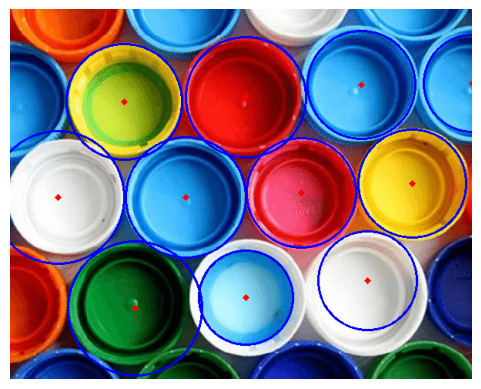

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ file
image_path = "/content/drive/MyDrive/Colab Notebooks/nnap.webp"
image = cv2.imread(image_path)

# Chuyển đổi ảnh sang RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Chuyển đổi ảnh sang không gian màu HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Tách kênh S (Saturation)
s_channel = image_hsv[:, :, 1]

# Làm mịn ảnh bằng Gaussian Filter
s_blur = cv2.GaussianBlur(s_channel, (5,5), 0)

# Ngưỡng Otsu để tạo ảnh nhị phân
_, binary_image = cv2.threshold(s_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Phát hiện biên bằng Sobel
sobel_x = cv2.Sobel(binary_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(binary_image, cv2.CV_64F, 0, 1, ksize=3)
sobel=cv2.magnitude(sobel_x,sobel_y)
sobel=np.uint8(np.clip(sobel,0,255))

# Áp dụng Hough Circle Transform để tìm hình tròn
gray_image=cv2.GaussianBlur(s_blur,(9,9),2)

circles = cv2.HoughCircles(
    gray_image,                # Ảnh đã làm mịn
    cv2.HOUGH_GRADIENT,      # Phương pháp gradient để tìm hình tròn
    dp=1,                     # Độ phân giải ảnh
    minDist=50,               # Khoảng cách tối thiểu giữa các tâm hình tròn
    param1=100,               # Ngưỡng biên (gradient)
    param2=30,                # Ngưỡng để xác nhận vòng tròn (giảm giá trị này để nhận diện nhiều vòng tròn hơn)
    minRadius=20,             # Bán kính tối thiểu
    maxRadius=100              # Bán kính tối đa
)

re_xu= image_rgb.copy()

# Hiển thị kết quả nếu tìm thấy hình tròn
if circles is not None:
    circles = np.uint16(np.around(circles))
    for x,y,r in circles[0, :]:
        cv2.circle(re_xu, (x,y), r, (0,0,255), 2)
        cv2.circle(re_xu, (x,y), 2, (255,0, 0), 3)

    print(f"Số lượng đối tượng phát hiện: {len(circles[0])}")
else:
    print("Không phát hiện được đối tượng nào.")

# Hiển thị ảnh kết quả
plt.imshow(re_xu)
plt.axis('off')
plt.show()
